In [141]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import pandas as pd
import numpy as np
import seaborn as sb
import spiceypy as spice

import itertools
import glob

In [142]:
%run plotting.py

In [143]:
moon_polar_radius = 1736e3  # m
JULIAN_DAY = 86400.0
JULIAN_DAY_ON_J2000 = 2451545.0

pos_names = ["pos_x", "pos_y", "pos_z"]
acc_names = ["acc_grav_moon", "acc_grav_earth", "acc_grav_sun", "acc_rp_sun"]

In [144]:
def read_simulation_results(dependent_variable_history_file):
    def gen_vector_colnames(names):
        colnames = []
        for name in names:
            if "kepler" in name:
                elements = ["a", "e", "i", "longAscNode", "argPeri", "trueAnom"]
            else:
                elements = ["x", "y", "z"]
            colnames.extend([f"{name}_{elem}" for elem in elements])
        return colnames
    
    df = pd.read_csv(dependent_variable_history_file,
                         names=gen_vector_colnames(["pos", "vel", "kepler", "pos_sun"] + acc_names))
    df["t_et"] = df.index
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D')
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    df["r_sun"] = np.sqrt(np.square(df[["pos_sun_x", "pos_sun_y", "pos_sun_z"]]).sum(axis=1))
    for acc in acc_names:
        df[acc] =np.sqrt(np.square(df[[f"{acc}_x", f"{acc}_y", f"{acc}_z"]]).sum(axis=1)) 
    
    return df

df_simulation = read_simulation_results("../../tudat-bundle/output/lro/baseline/lro_dependent_variable_history.dat")
df_simulation

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,kepler_a,kepler_e,kepler_i,kepler_longAscNode,...,acc_rp_sun_x,acc_rp_sun_y,acc_rp_sun_z,t_et,r,r_sun,acc_grav_moon,acc_grav_earth,acc_grav_sun,acc_rp_sun
2010-06-26 06:01:06.184231680,129827.263762,-11849.086027,-1.790239e+06,1629.955691,216.321125,126.742167,1.787270e+06,0.007414,1.554783,0.697887,...,3.503189e-09,-4.256102e-08,5.302054e-11,3.308041e+08,1.794980e+06,1.524555e+11,1.521154,0.000012,6.724166e-08,4.270498e-08
2010-06-26 06:01:11.184244736,137975.633567,-10767.353139,-1.789587e+06,1629.386437,216.371278,134.326610,1.787267e+06,0.007414,1.554783,0.698221,...,3.503144e-09,-4.255920e-08,5.313048e-11,3.308041e+08,1.794930e+06,1.524555e+11,1.521200,0.000012,6.723918e-08,4.270317e-08
2010-06-26 06:01:16.184257792,146121.070209,-9685.380766,-1.788896e+06,1628.782429,216.416917,141.908597,1.787263e+06,0.007413,1.554783,0.698591,...,3.503103e-09,-4.255738e-08,5.324288e-11,3.308041e+08,1.794880e+06,1.524555e+11,1.521235,0.000012,6.723671e-08,4.270135e-08
2010-06-26 06:01:21.184271104,154263.399963,-8603.191511,-1.788168e+06,1628.143686,216.458029,149.487911,1.787259e+06,0.007413,1.554783,0.698998,...,3.503056e-09,-4.255562e-08,5.339784e-11,3.308041e+08,1.794830e+06,1.524555e+11,1.521259,0.000012,6.723424e-08,4.269960e-08
2010-06-26 06:01:26.184243968,162402.449243,-7520.808044,-1.787401e+06,1627.470246,216.494600,157.064329,1.787254e+06,0.007413,1.554783,0.699444,...,3.502973e-09,-4.255381e-08,5.352844e-11,3.308041e+08,1.794780e+06,1.524555e+11,1.521269,0.000012,6.723179e-08,4.269778e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-06-26 15:25:46.184250624,55286.011162,-25105.118258,-1.795627e+06,1632.354456,215.894636,58.145638,1.787302e+06,0.008434,1.552919,0.704515,...,3.854992e-09,-4.254547e-08,7.106332e-11,3.308379e+08,1.796654e+06,1.524594e+11,1.518456,0.000012,6.731166e-08,4.271982e-08
2010-06-26 15:25:51.184263936,63447.168503,-24025.379172,-1.795318e+06,1632.102716,216.000232,65.733274,1.787300e+06,0.008434,1.552919,0.704671,...,3.854946e-09,-4.254400e-08,7.120277e-11,3.308380e+08,1.796599e+06,1.524594e+11,1.518541,0.000012,6.730888e-08,4.271835e-08
2010-06-26 15:25:56.184236800,71606.980657,-22945.123588,-1.794970e+06,1631.816379,216.101238,73.320170,1.787299e+06,0.008433,1.552919,0.704838,...,3.854924e-09,-4.254251e-08,7.132577e-11,3.308380e+08,1.796544e+06,1.524594e+11,1.518626,0.000012,6.730611e-08,4.271687e-08
2010-06-26 15:26:01.184249856,79765.274609,-21864.374418,-1.794584e+06,1631.495433,216.197670,80.906163,1.787297e+06,0.008433,1.552919,0.705018,...,3.854916e-09,-4.254105e-08,7.146873e-11,3.308380e+08,1.796489e+06,1.524594e+11,1.518710,0.000012,6.730335e-08,4.271541e-08


In [145]:
def generate_lro_ephemeris(timestamps):
    path = "/home/dominik/dev/tudat-bundle/spice/lro/data"
    for file in glob.glob(f"{path}/spk/*.bsp"):
        spice.furnsh(file)
    spice.furnsh(f"{path}/lsk/naif0012.tls")
    
    ephemeris = spice.spkezr("LRO", timestamps, "ECLIPJ2000", "NONE", "Moon")[0]
    spice.kclear()
    
    colnames = ["pos_x", "pos_y", "pos_z", "vel_x", "vel_y", "vel_z"]
    
    df = pd.DataFrame(ephemeris, index=timestamps, columns=colnames)
    df["t_et"] = df.index
    df[colnames] *= 1e3
    df.index = pd.to_datetime(df.index / JULIAN_DAY + JULIAN_DAY_ON_J2000, origin="julian", unit='D').rename("t")
    
    df["r"] = np.sqrt(np.square(df[["pos_x", "pos_y", "pos_z"]]).sum(axis=1))
    
    return df

df_ephemeris = generate_lro_ephemeris(df_simulation["t_et"])
df_ephemeris

,pos_x,pos_y,pos_z,vel_x,vel_y,vel_z,t_et,r
t,,,,,,,,
2010-06-26 06:01:06.184231680,129827.263859,-11849.086014,-1.790239e+06,1629.955691,216.321125,126.742167,3.308041e+08,1.794980e+06
2010-06-26 06:01:11.184244736,137975.633819,-10767.353316,-1.789587e+06,1629.386491,216.371202,134.326789,3.308041e+08,1.794930e+06
2010-06-26 06:01:16.184257792,146121.070764,-9685.381514,-1.788896e+06,1628.782488,216.416766,141.908965,3.308041e+08,1.794880e+06
2010-06-26 06:01:21.184271104,154263.400730,-8603.193194,-1.788168e+06,1628.143705,216.457808,149.488454,3.308041e+08,1.794830e+06
2010-06-26 06:01:26.184243968,162402.449919,-7520.810983,-1.787401e+06,1627.470185,216.494321,157.065019,3.308041e+08,1.794780e+06
...,...,...,...,...,...,...,...,...
2010-06-26 15:25:46.184250624,55353.020924,-25088.044015,-1.795621e+06,1632.358053,215.868179,58.219175,3.308379e+08,1.796650e+06
2010-06-26 15:25:51.184263936,63514.195545,-24008.437342,-1.795311e+06,1632.106033,215.973723,65.806668,3.308380e+08,1.796595e+06
2010-06-26 15:25:56.184236800,71674.023635,-22928.314449,-1.794963e+06,1631.819440,216.074669,73.393428,3.308380e+08,1.796540e+06


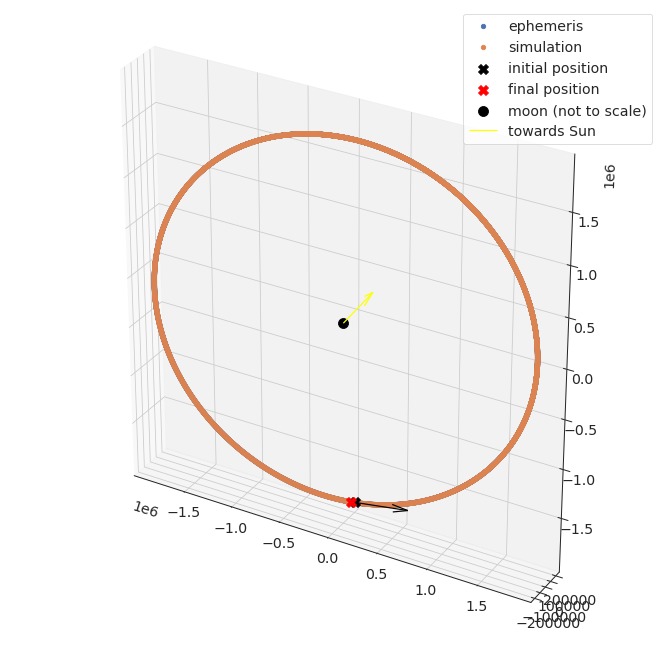

In [146]:
def plot_orbit_3d(df_ephemeris, df_simulation):
    def do_plot(df, label):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
    
    def do_plot_with_acc(df, label, acc_name):
        ax.scatter(df["pos_x"], df["pos_y"], df["pos_z"], label=label)
        df = df.iloc[::int(len(df.index) / 20)]
        ax.quiver(df["pos_x"], df["pos_y"], df["pos_z"],
                  df[f"{acc_name}_x"], df[f"{acc_name}_y"], df[f"{acc_name}_z"], length=2e9, zorder=-1)
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d', computed_zorder=False)
    
    # do_plot(df.loc["2009-07-10":"2009-07-20"])
    # do_plot(df.loc["2009-10-10":"2009-10-20"])
    # do_plot(df.loc["2010-01-01":"2010-01-02"])
    
    do_plot(df_ephemeris, "ephemeris")
    do_plot_with_acc(df_simulation, "simulation", "acc_rp_sun")
    
    df_init = df_ephemeris.iloc[0]
    df_final = df_ephemeris.iloc[-1]
    ax.quiver(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], df_init["vel_x"], df_init["vel_y"], df_init["vel_z"], color="black", length=5e5, normalize=True)
    ax.scatter(df_init["pos_x"], df_init["pos_y"], df_init["pos_z"], c="black", marker="X", s=100, label="initial position", zorder=5)
    ax.scatter(df_final["pos_x"], df_final["pos_y"], df_final["pos_z"], c="red", marker="X", s=100, label="final position", zorder=5)
    
    ax.scatter(0, 0, 0, c="black", s=100, label="moon (not to scale)")
    
    pos_sun_init = df_simulation[["pos_sun_x", "pos_sun_y", "pos_sun_z"]].iloc[0] / df_simulation["r_sun"].iloc[0]
    ax.quiver(0, 0, 0, *pos_sun_init, length=6e5, color="yellow", label="towards Sun")
    
    limits = np.array([getattr(ax, f'get_{axis}lim')() for axis in 'xyz'])
    ax.set_box_aspect(np.ptp(limits, axis=1))
    # Or once Matplotlib 3.6 is released: https://stackoverflow.com/a/72928548
    
    plt.legend()
    
plot_orbit_3d(df_ephemeris, df_simulation)

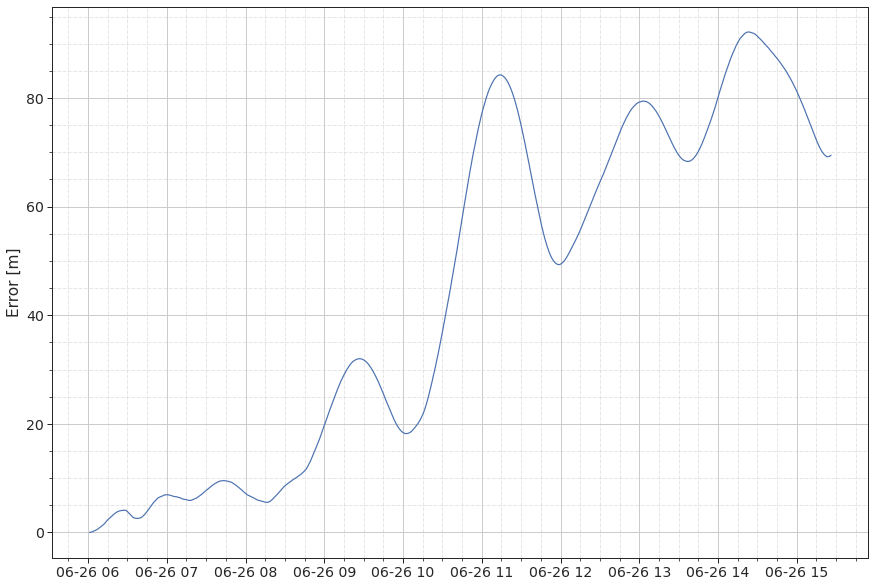

In [147]:
def plot_error(df_ephemeris, df_simulation):
    error = df_ephemeris[["pos_x", "pos_y", "pos_z"]] - df_simulation[["pos_x", "pos_y", "pos_z"]]
    error["total"] = np.sqrt(np.square(error).sum(axis=1))
    
    plt.figure(figsize=[12, 8])
    plt.plot(error.index, error["total"])
    plt.ylabel("Error [m]")
    format_plot()
    
plot_error(df_ephemeris, df_simulation)

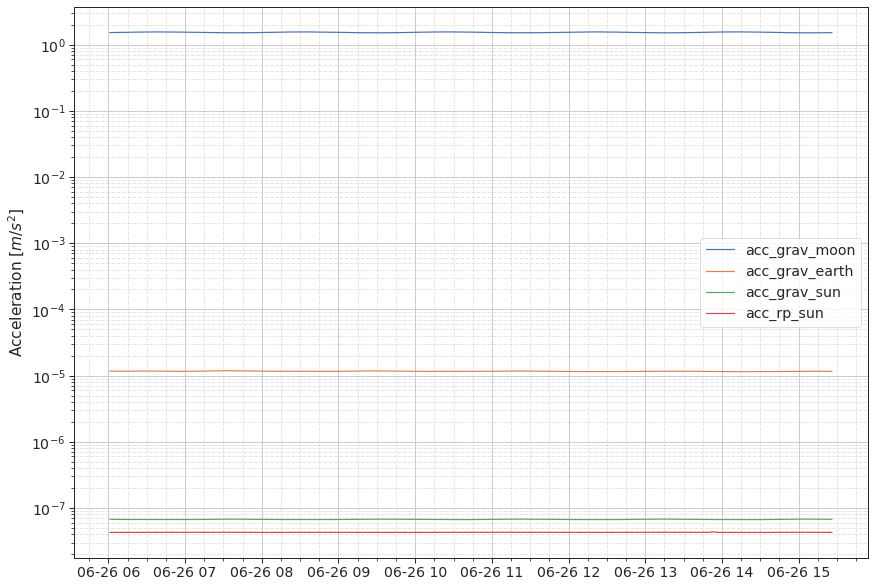

In [148]:
def plot_accelerations(df_simulation):
    plt.figure(figsize=[12, 8])
    
    for acc in acc_names:
        plt.plot(df_simulation.index, df_simulation[acc], label=acc)
    
    plt.legend()
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.yscale("log")
    format_plot(ylocator=LogLocator(base=10, subs="all", numticks=100))
    
plot_accelerations(df_simulation)

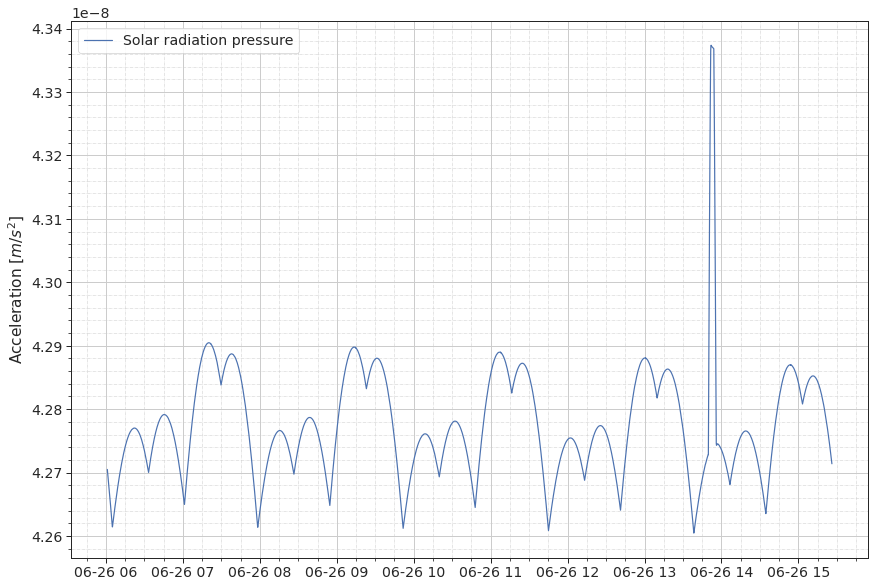

In [149]:
def plot_rp_acceleration(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["acc_rp_sun"], label="Solar radiation pressure")
    
    plt.ylabel("Acceleration [$m/s^2$]")
    plt.legend()
    
    format_plot()
    
plot_rp_acceleration(df_simulation)

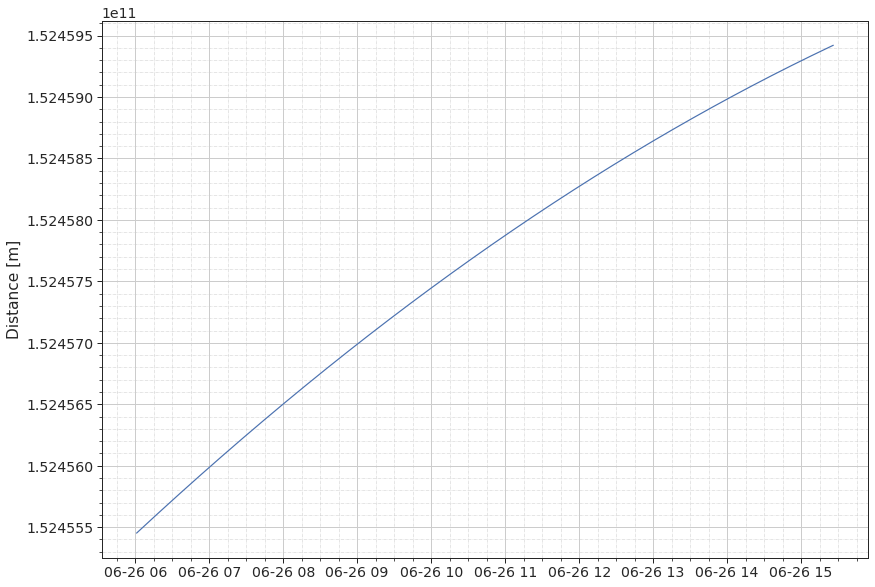

In [150]:
def plot_distance_moon_sun(df_simulation):
    plt.figure(figsize=[12, 8])
    
    plt.plot(df_simulation.index, df_simulation["r_sun"])
    y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
    plt.gca().yaxis.set_major_formatter(y_formatter)
    
    plt.ylabel("Distance [m]")
    format_plot()
    
plot_distance_moon_sun(df_simulation)

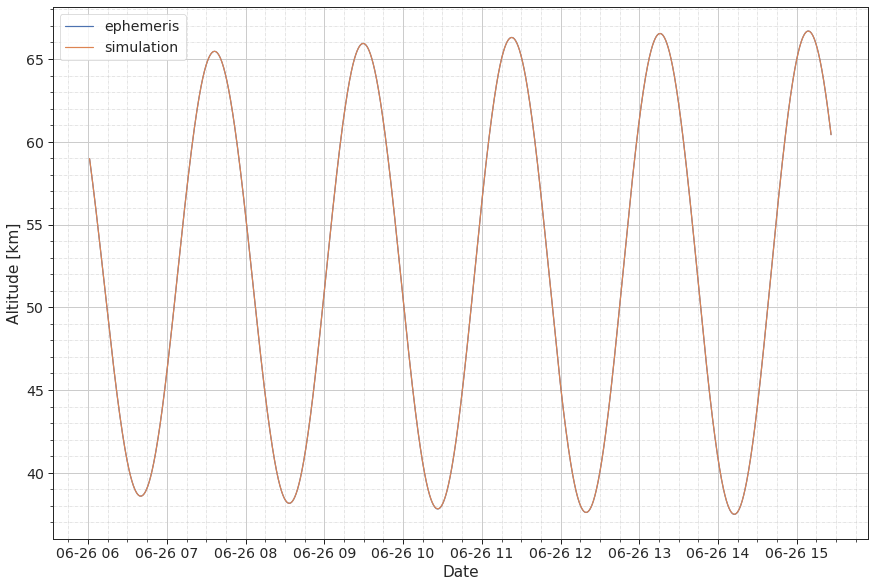

In [151]:
def plot_altitude(df_ephemeris, df_simulation):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius) / 1e3, label="ephemeris")
    plt.plot(df_simulation.index, (df_simulation["r"]-moon_polar_radius) / 1e3, label="simulation")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    format_plot()

plot_altitude(df_ephemeris, df_simulation)

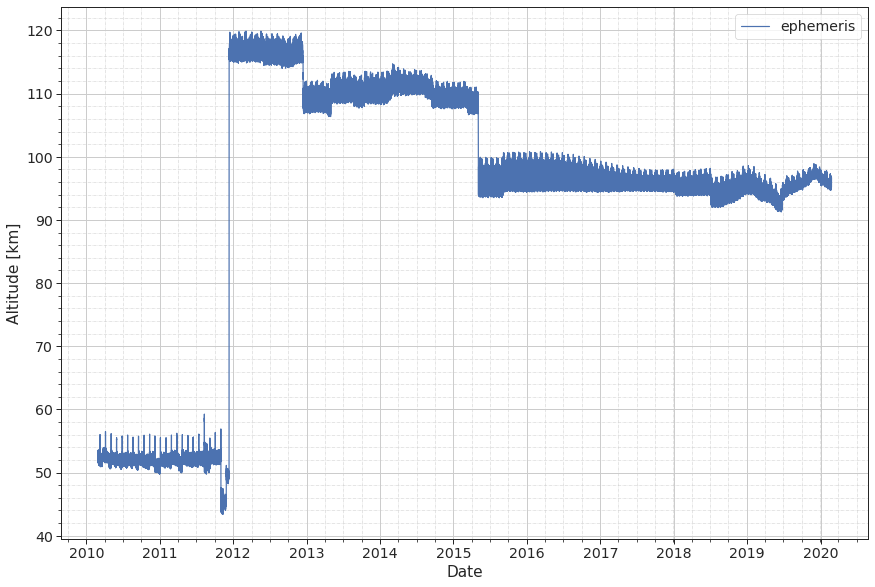

In [152]:
def plot_altitude_mission():
    from datetime import datetime as dt
    
    t_start = df_simulation["t_et"].iloc[0] - 120 * JULIAN_DAY
    t_duration = 10 * 365 * JULIAN_DAY
    t_et = np.arange(t_start, t_start + t_duration, 60*60)  # hourly
    df_ephemeris = generate_lro_ephemeris(t_et)
    
    plt.figure(figsize=[12, 8])
    plt.plot(df_ephemeris.index, (df_ephemeris["r"]-moon_polar_radius).rolling(10).mean() / 1e3, label="ephemeris")
    
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.legend()
    
    # plt.xlim([dt(2009, 9, 1), dt(2009, 11, 1)]) # entering mission orbit
    # plt.xlim([dt(2010, 1, 1), dt(2010, 1, 3)])
    
    format_plot()
    
plot_altitude_mission()